# Importing Libraries and Dataset

In [1]:
!pip install xgboost

     |████████████████████████████████| 192.9 MB 114 kB/s  eta 0:00:01               | 46.1 MB 18.8 MB/s eta 0:00:08��████████████████████████▌   | 172.1 MB 91.3 MB/s eta 0:00:01


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn import metrics
from sklearn import linear_model
from sklearn import ensemble
from sklearn import tree
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import xgboost
import sklearn

In [3]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_66b4bbc3035844879604f690c514d05c = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='fqvOyC0wB6LLL3BhVtGXxjEGJNDoAlwjqR66H-vkT6Ry',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

body = client_66b4bbc3035844879604f690c514d05c.get_object(Bucket='rainfallpredict-donotdelete-pr-9stpkxnrbnfqrh',Key='weatherAUS.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

rf = pd.read_csv(body)
rf.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# Data Analysis

In [4]:
rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
rf.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [6]:
rf.isnull().any()

Date             False
Location         False
MinTemp           True
MaxTemp           True
Rainfall          True
Evaporation       True
Sunshine          True
WindGustDir       True
WindGustSpeed     True
WindDir9am        True
WindDir3pm        True
WindSpeed9am      True
WindSpeed3pm      True
Humidity9am       True
Humidity3pm       True
Pressure9am       True
Pressure3pm       True
Cloud9am          True
Cloud3pm          True
Temp9am           True
Temp3pm           True
RainToday         True
RainTomorrow      True
dtype: bool

In [7]:
rf.shape

(145460, 23)

# Handling Missing values

In [8]:
#handling missing values for categorical data using mode
rf['WindGustDir'].fillna(rf['WindGustDir'].mode()[0], inplace = True)
rf['WindDir3pm'].fillna(rf['WindSpeed3pm'].mode()[0], inplace = True)
rf['WindDir9am'].fillna(rf['WindDir9am'].mode()[0], inplace = True)
rf['RainToday'].fillna(rf['RainToday'].mode()[0], inplace = True)
rf['RainTomorrow'].fillna(rf['RainTomorrow'].mode()[0], inplace = True)

In [9]:
#handling missing values for large boundaries using median
rf['Pressure9am'].fillna(rf['Pressure9am'].median(), inplace = True)
rf['Pressure3pm'].fillna(rf['Pressure3pm'].median(), inplace = True)

In [10]:
#handling missing values for normal boundaries using mean
rf['MinTemp'].fillna(rf['MinTemp'].mean(), inplace = True)
rf['MaxTemp'].fillna(rf['MaxTemp'].mean(), inplace = True)
rf['Rainfall'].fillna(rf['Rainfall'].mean(), inplace = True)
rf['Evaporation'].fillna(rf['Evaporation'].mean(), inplace = True)
rf['Sunshine'].fillna(rf['Sunshine'].mean(), inplace = True)
rf['WindGustSpeed'].fillna(rf['WindGustSpeed'].mean(), inplace = True)
rf['WindSpeed9am'].fillna(rf['WindSpeed9am'].mean(), inplace = True)
rf['WindSpeed3pm'].fillna(rf['WindSpeed3pm'].mean(), inplace = True)
rf['Humidity9am'].fillna(rf['Humidity9am'].mean(), inplace = True)
rf['Humidity3pm'].fillna(rf['Humidity3pm'].mean(), inplace = True)
rf['Cloud9am'].fillna(rf['Cloud9am'].mean(), inplace = True)
rf['Cloud3pm'].fillna(rf['Cloud3pm'].mean(), inplace = True)
rf['Temp9am'].fillna(rf['Temp9am'].mean(), inplace = True)
rf['Temp3pm'].fillna(rf['Temp3pm'].mean(), inplace = True)

In [11]:
rf.isnull().any()

Date             False
Location         False
MinTemp          False
MaxTemp          False
Rainfall         False
Evaporation      False
Sunshine         False
WindGustDir      False
WindGustSpeed    False
WindDir9am       False
WindDir3pm       False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Cloud9am         False
Cloud3pm         False
Temp9am          False
Temp3pm          False
RainToday        False
RainTomorrow     False
dtype: bool

In [12]:
rf =rf[~pd.to_numeric(rf['WindDir3pm'],errors='coerce').notna()]

# Converting object to numerical for categorical values

In [13]:
rf['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [14]:
rf['WindDir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', 'NE'], dtype=object)

In [15]:
rf['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', 'N', 'SSW', 'WSW',
       'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [16]:
rf['RainToday'].unique()

array(['No', 'Yes'], dtype=object)

In [17]:
rf['RainTomorrow'].unique()

array(['No', 'Yes'], dtype=object)

In [18]:
rf['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [19]:
le = LabelEncoder()
rf['WindGustDir'] = le.fit_transform(rf['WindGustDir'])
rf['WindDir9am'] = le.fit_transform(rf['WindDir9am'])
rf['RainToday'] = le.fit_transform(rf['RainToday'])
rf['Location'] = le.fit_transform(rf['Location'])
rf['WindDir3pm'] = le.fit_transform(rf['WindDir3pm'])
rf['RainTomorrow'] = le.fit_transform(rf['RainTomorrow'])

In [20]:
rf.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,2,13.4,22.9,0.6,5.468232,7.611178,13,44.0,13,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0
1,2008-12-02,2,7.4,25.1,0.0,5.468232,7.611178,14,44.0,6,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0
2,2008-12-03,2,12.9,25.7,0.0,5.468232,7.611178,15,46.0,13,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0
3,2008-12-04,2,9.2,28.0,0.0,5.468232,7.611178,4,24.0,9,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0
4,2008-12-05,2,17.5,32.3,1.0,5.468232,7.611178,13,41.0,1,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0


In [21]:
y=[]
m=[]
d=[]
for i in rf['Date']:
    f,g,h=map(int,i.split('-'))
    y.append(f)
    m.append(g)
    d.append(h)
rf.loc[:,'year']=y
rf.loc[:,'month']=m
rf.loc[:,'date']=d
rf=rf.drop('Evaporation',axis=1)
rf=rf.drop('Sunshine',axis=1)

In [22]:
rf.shape

(141232, 24)

# Data Visulaization

In [23]:
c = rf.corr()
c

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,date
Location,1.000000,-0.005941,-0.024425,-0.002777,0.008577,0.070028,-0.003389,0.011950,0.078437,0.064912,...,0.047901,-0.005903,-0.014702,-0.016780,-0.023560,-0.004623,-0.004049,0.030403,-0.006426,-0.000522
MinTemp,-0.005941,1.000000,0.734311,0.103228,-0.141351,0.170605,-0.033938,-0.161050,0.175562,0.170271,...,-0.435934,0.060200,0.016225,0.898083,0.702082,0.054134,0.082424,0.037292,-0.202788,0.002130
MaxTemp,-0.024425,0.734311,1.000000,-0.074428,-0.214864,0.062130,-0.218118,-0.182395,0.012417,0.041142,...,-0.398614,-0.226462,-0.214136,0.880682,0.973958,-0.226796,-0.157041,0.061538,-0.164206,0.000043
Rainfall,-0.002777,0.103228,-0.074428,1.000000,0.044340,0.128740,0.086561,0.048692,0.087424,0.059437,...,-0.121207,0.172114,0.147567,0.011132,-0.078709,0.500919,0.234807,-0.009947,-0.030350,0.001850
WindGustDir,0.008577,-0.141351,-0.214864,0.044340,1.000000,0.137677,0.372352,0.566805,0.015863,0.092068,...,-0.032654,0.066130,0.058517,-0.182806,-0.227127,0.127726,0.049606,-0.033413,0.041970,-0.001109
WindGustSpeed,0.070028,0.170605,0.062130,0.128740,0.137677,1.000000,0.072115,0.138309,0.583378,0.660896,...,-0.384319,0.054720,0.082435,0.142187,0.027174,0.147837,0.225368,-0.030120,0.059114,-0.008862
WindDir9am,-0.003389,-0.033938,-0.218118,0.086561,0.372352,0.072115,1.000000,0.308336,0.102476,0.108181,...,0.042545,0.087234,0.055398,-0.120644,-0.226340,0.169386,0.035706,-0.002334,0.026572,-0.006967
WindDir3pm,0.011950,-0.161050,-0.182395,0.048692,0.566805,0.138309,0.308336,1.000000,0.054332,0.097006,...,-0.038695,0.047622,0.050020,-0.177572,-0.194141,0.123481,0.028811,-0.003344,0.035571,-0.000484
WindSpeed9am,0.078437,0.175562,0.012417,0.087424,0.015863,0.583378,0.102476,0.054332,1.000000,0.512771,...,-0.165716,0.020195,0.045099,0.126773,-0.000109,0.099897,0.090301,-0.016522,0.051510,-0.008922
WindSpeed3pm,0.064912,0.170271,0.041142,0.059437,0.092068,0.660896,0.108181,0.097006,0.512771,1.000000,...,-0.239856,0.045981,0.025450,0.155134,0.018378,0.080999,0.091149,-0.032479,0.060656,-0.010042


<AxesSubplot:>

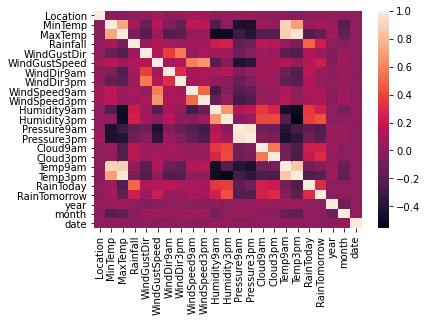

In [24]:
sns.heatmap(data=c,xticklabels= c.columns.values,yticklabels=c.columns.values)

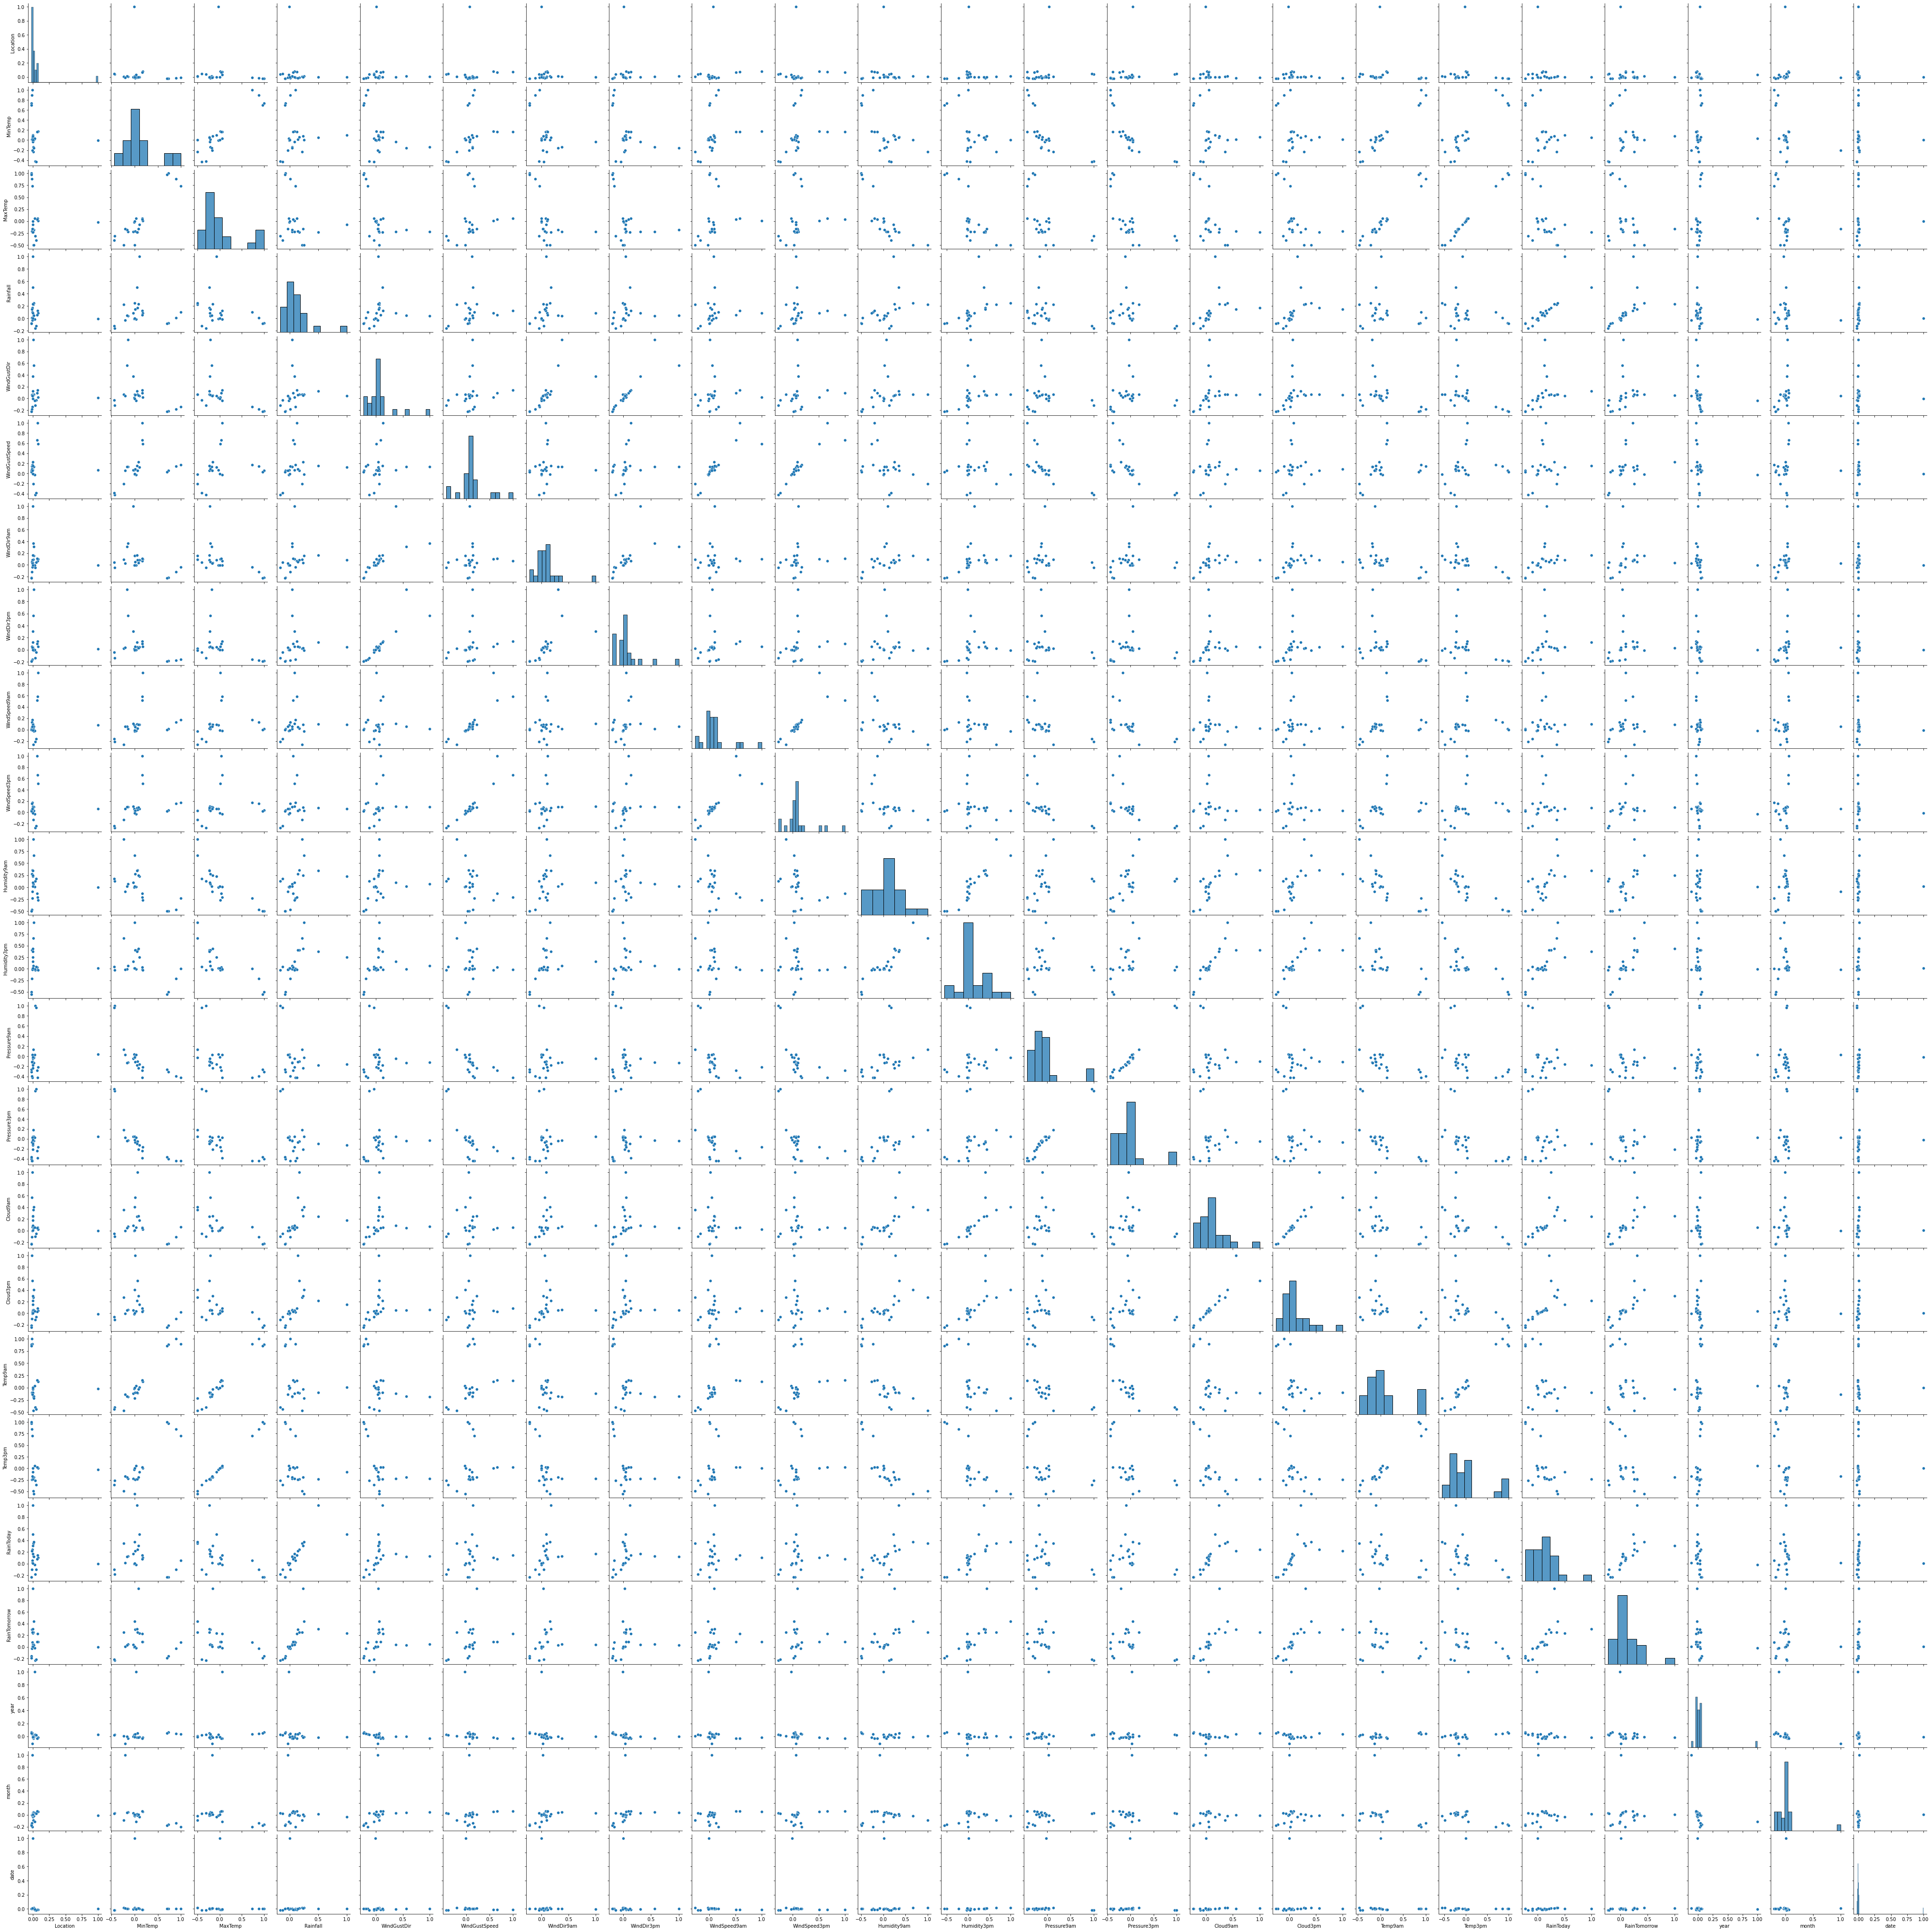

In [25]:
sns.pairplot(c)

<AxesSubplot:>

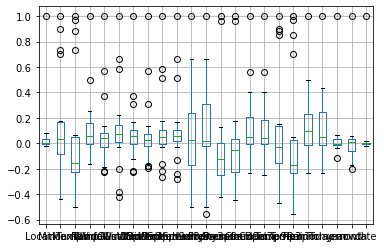

In [26]:
c.boxplot()

In [27]:
## Data Preprocessing 
y = rf['RainTomorrow']
pd.DataFrame(y)

,RainTomorrow
0,0
1,0
2,0
3,0
4,0
...,...
145455,0
145456,0
145457,0
145458,0


In [28]:
y

0         0
1         0
2         0
3         0
4         0
         ..
145455    0
145456    0
145457    0
145458    0
145459    0
Name: RainTomorrow, Length: 141232, dtype: int64

In [29]:
x = rf.drop('RainTomorrow',axis=1)
x
xy = x.drop('Date',axis=1)
xy

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,year,month,date
0,2,13.4,22.900000,0.6,13,44.00000,13,14,20.0,24.0,...,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,2008,12,1
1,2,7.4,25.100000,0.0,14,44.00000,6,15,4.0,22.0,...,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,2008,12,2
2,2,12.9,25.700000,0.0,15,46.00000,13,15,19.0,26.0,...,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,2008,12,3
3,2,9.2,28.000000,0.0,4,24.00000,9,0,11.0,9.0,...,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,2008,12,4
4,2,17.5,32.300000,1.0,13,41.00000,1,7,7.0,20.0,...,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,41,2.8,23.400000,0.0,0,31.00000,9,1,13.0,11.0,...,1024.6,1020.3,4.447461,4.50993,10.1,22.4,0,2017,6,21
145456,41,3.6,25.300000,0.0,6,22.00000,9,3,13.0,9.0,...,1023.5,1019.1,4.447461,4.50993,10.9,24.5,0,2017,6,22
145457,41,5.4,26.900000,0.0,3,37.00000,9,14,9.0,9.0,...,1021.0,1016.8,4.447461,4.50993,12.5,26.1,0,2017,6,23
145458,41,7.8,27.000000,0.0,9,28.00000,10,3,13.0,7.0,...,1019.4,1016.5,3.000000,2.00000,15.1,26.0,0,2017,6,24


In [30]:
t=xy['RainToday']
xy=xy.drop('RainToday',axis=1)
xy.loc[:,'RainToday']=t
xy

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year,month,date,RainToday
0,2,13.4,22.900000,0.6,13,44.00000,13,14,20.0,24.0,...,1007.7,1007.1,8.000000,4.50993,16.9,21.8,2008,12,1,0
1,2,7.4,25.100000,0.0,14,44.00000,6,15,4.0,22.0,...,1010.6,1007.8,4.447461,4.50993,17.2,24.3,2008,12,2,0
2,2,12.9,25.700000,0.0,15,46.00000,13,15,19.0,26.0,...,1007.6,1008.7,4.447461,2.00000,21.0,23.2,2008,12,3,0
3,2,9.2,28.000000,0.0,4,24.00000,9,0,11.0,9.0,...,1017.6,1012.8,4.447461,4.50993,18.1,26.5,2008,12,4,0
4,2,17.5,32.300000,1.0,13,41.00000,1,7,7.0,20.0,...,1010.8,1006.0,7.000000,8.00000,17.8,29.7,2008,12,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,41,2.8,23.400000,0.0,0,31.00000,9,1,13.0,11.0,...,1024.6,1020.3,4.447461,4.50993,10.1,22.4,2017,6,21,0
145456,41,3.6,25.300000,0.0,6,22.00000,9,3,13.0,9.0,...,1023.5,1019.1,4.447461,4.50993,10.9,24.5,2017,6,22,0
145457,41,5.4,26.900000,0.0,3,37.00000,9,14,9.0,9.0,...,1021.0,1016.8,4.447461,4.50993,12.5,26.1,2017,6,23,0
145458,41,7.8,27.000000,0.0,9,28.00000,10,3,13.0,7.0,...,1019.4,1016.5,3.000000,2.00000,15.1,26.0,2017,6,24,0


# Standardizing the data 

In [31]:
y

0         0
1         0
2         0
3         0
4         0
         ..
145455    0
145456    0
145457    0
145458    0
145459    0
Name: RainTomorrow, Length: 141232, dtype: int64

In [32]:
sc = StandardScaler()

In [33]:
nam = xy.columns
nam

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'year',
       'month', 'date', 'RainToday'],
      dtype='object')

In [34]:
xy= sc.fit_transform(xy)
xy

array([[-1.54131535,  0.18574564, -0.05274321, ...,  1.63162534,
        -1.67351989, -0.52918863],
       [-1.54131535, -0.7544159 ,  0.25676025, ...,  1.63162534,
        -1.55981332, -0.52918863],
       [-1.54131535,  0.10739884,  0.34117028, ...,  1.63162534,
        -1.44610676, -0.52918863],
       ...,
       [ 1.19659514, -1.06780308,  0.50999035, ..., -0.1164346 ,
         0.82802456, -0.52918863],
       [ 1.19659514, -0.69173847,  0.52405869, ..., -0.1164346 ,
         0.94173112, -0.52918863],
       [ 1.19659514,  0.42078602, -0.00753485, ..., -0.1164346 ,
         1.05543769, -0.52918863]])

In [35]:
pd.DataFrame(xy,columns=nam)

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year,month,date,RainToday
0,-1.541315,0.185746,-0.052743,-0.209191,1.069832,0.294295,1.313556,1.355682,0.662432,0.597502,...,-1.465445,-1.210998,1.568987,0.002316,-0.019111,0.011962,-1.880696,1.631625,-1.673520,-0.529189
1,-1.541315,-0.754416,0.256760,-0.281071,1.283188,0.294295,-0.232342,1.573040,-1.148744,0.367262,...,-1.037183,-1.106683,0.002417,0.002316,0.027276,0.373934,-1.880696,1.631625,-1.559813,-0.529189
2,-1.541315,0.107399,0.341170,-0.281071,1.496544,0.445663,1.313556,1.573040,0.549234,0.827742,...,-1.480213,-0.972565,0.002417,-1.186015,0.614845,0.214667,-1.880696,1.631625,-1.446107,-0.529189
3,-1.541315,-0.472367,0.664742,-0.281071,-0.850375,-1.219387,0.430186,-1.687324,-0.356354,-1.129296,...,-0.003448,-0.361579,0.002417,0.002316,0.166437,0.692469,-1.880696,1.631625,-1.332400,-0.529189
4,-1.541315,0.828189,1.269681,-0.161272,1.069832,0.067243,-1.336554,-0.165821,-0.809148,0.137023,...,-1.007648,-1.374921,1.128015,1.654697,0.120050,1.155794,-1.880696,1.631625,-1.218694,-0.529189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141227,1.196595,-1.475206,0.017598,-0.281071,-1.703800,-0.689598,0.430186,-1.469966,-0.129957,-0.899056,...,1.030287,0.756076,0.002417,0.002316,-1.070550,0.098836,1.678913,-0.116435,0.600611,-0.529189
141228,1.196595,-1.349852,0.284897,-0.281071,-0.423663,-1.370755,0.430186,-1.035251,-0.129957,-1.129296,...,0.867843,0.577251,0.002417,0.002316,-0.946852,0.402892,1.678913,-0.116435,0.714318,-0.529189
141229,1.196595,-1.067803,0.509990,-0.281071,-1.063731,-0.235494,0.430186,1.355682,-0.582751,-1.129296,...,0.498652,0.234504,0.002417,0.002316,-0.699454,0.634554,1.678913,-0.116435,0.828025,-0.529189
141230,1.196595,-0.691738,0.524059,-0.281071,0.216406,-0.916650,0.651028,-1.035251,-0.129957,-1.359536,...,0.262369,0.189797,-0.635872,-1.186015,-0.297433,0.620075,1.678913,-0.116435,0.941731,-0.529189


# training and testing the dataset 

In [36]:
y

0         0
1         0
2         0
3         0
4         0
         ..
145455    0
145456    0
145457    0
145458    0
145459    0
Name: RainTomorrow, Length: 141232, dtype: int64

In [37]:
x_train,x_test,y_train,y_test = model_selection.train_test_split(xy, y ,test_size = 0.2, random_state = 0)

In [38]:
y

0         0
1         0
2         0
3         0
4         0
         ..
145455    0
145456    0
145457    0
145458    0
145459    0
Name: RainTomorrow, Length: 141232, dtype: int64

# Model Building

In [39]:
XGBoost = xgboost.XGBRFClassifier()
Rand_forest = sklearn.ensemble.RandomForestClassifier()
svm = sklearn.svm.SVC()
Dtree = sklearn.tree.DecisionTreeClassifier()
GBM = sklearn.ensemble.GradientBoostingClassifier()
log = sklearn.linear_model.LogisticRegression()

In [40]:
XGBoost.fit(x_train,y_train)
Rand_forest.fit(x_train,y_train)
svm.fit(x_train,y_train)
Dtree.fit(x_train,y_train)
GBM.fit(x_train,y_train)
log.fit(x_train,y_train)

LogisticRegression()

In [41]:
p1 = XGBoost.predict(x_test)
p2 = Rand_forest.predict(x_test)
p3 = svm.predict(x_test)
p4 = Dtree.predict(x_test)
p5 = GBM.predict(x_test)
p6 = log.predict(x_test)

# Model Evaluation

In [42]:
print("xgboost:",metrics.accuracy_score(y_test,p1))
print("Rand_forest:",metrics.accuracy_score(y_test,p2))
print("svm:",metrics.accuracy_score(y_test,p3))
print("Dtree:",metrics.accuracy_score(y_test,p4))
print("GBM:",metrics.accuracy_score(y_test,p5))
print("log:",metrics.accuracy_score(y_test,p6))

xgboost: 0.8439126278896874
Rand_forest: 0.8547810386943746
svm: 0.8539667929337629
Dtree: 0.786561404750947
GBM: 0.849930966120296
log: 0.8456119233900945


In [43]:
y_pred = p2
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [44]:
conf_matrix = metrics.confusion_matrix(y_test,y_pred)

In [45]:
import matplotlib.pyplot as plt

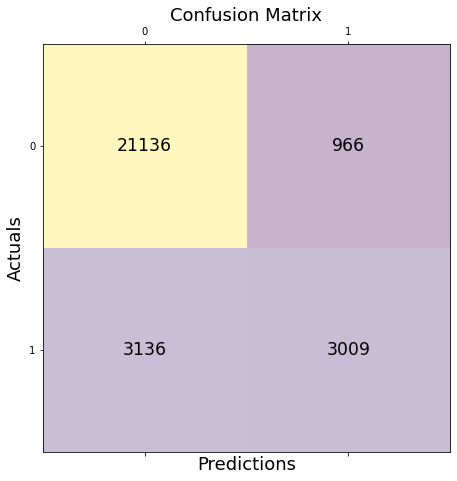

In [46]:
fig, ax = plt.subplots(figsize=(7.5,7.5))
ax.matshow(conf_matrix, alpha =0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j ,y=i, s =conf_matrix[i,j], va = 'center', ha = 'center', size = 'xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize = 18)
plt.show()

In [47]:
print(conf_matrix)
print("Accuracy:", accuracy_score(y_test,y_pred))
print("Precision:",  precision_score(y_test,y_pred))
print("Recall:", recall_score(y_test,y_pred))
print("F1-score:", f1_score(y_test,y_pred))

[[21136   966]
 [ 3136  3009]]
Accuracy: 0.8547810386943746
Precision: 0.7569811320754717
Recall: 0.48966639544345
F1-score: 0.5946640316205534


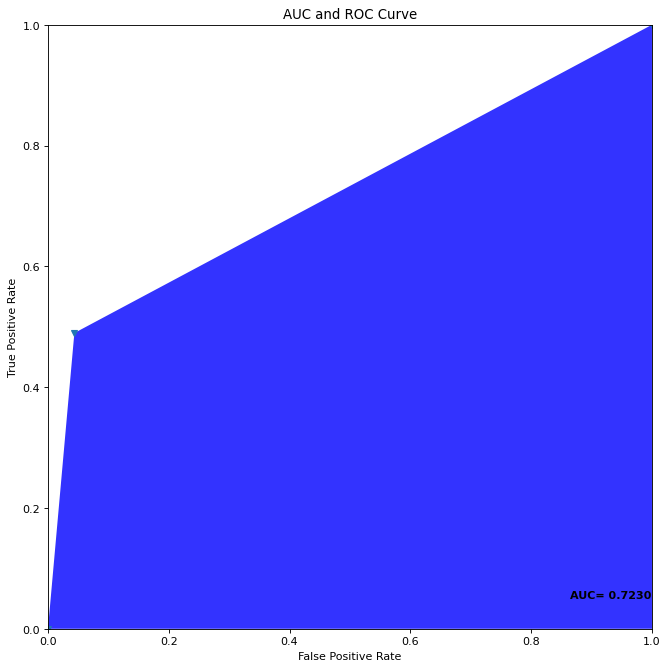

In [48]:
auc = metrics.roc_auc_score(y_test,y_pred)

fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred)

plt.figure(figsize=(12,10), dpi=80)
plt.axis('scaled')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title("AUC and ROC Curve")
plt.plot(fpr, tpr, 'v')
plt.fill_between(fpr, tpr, facecolor = 'blue', alpha=0.8)
plt.text(1, 0.05, 'AUC= %0.4f' % auc, ha = 'right', fontsize=10, weight='bold', color ='black')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [49]:
place=['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru']
d={}
c=0
for i in sorted(place):
    d[i]=c
    c+=1
direction=['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE','S', 'NW', 'SE', 'ESE', 'E', 'SSW']
c=0
for i in sorted(direction):
    d[i]=c
    c+=1
d['YES']=1
d['NO']=0
d

{'Adelaide': 0,
 'Albany': 1,
 'Albury': 2,
 'AliceSprings': 3,
 'BadgerysCreek': 4,
 'Ballarat': 5,
 'Bendigo': 6,
 'Brisbane': 7,
 'Cairns': 8,
 'Canberra': 9,
 'Cobar': 10,
 'CoffsHarbour': 11,
 'Dartmoor': 12,
 'Darwin': 13,
 'GoldCoast': 14,
 'Hobart': 15,
 'Katherine': 16,
 'Launceston': 17,
 'Melbourne': 18,
 'MelbourneAirport': 19,
 'Mildura': 20,
 'Moree': 21,
 'MountGambier': 22,
 'MountGinini': 23,
 'Newcastle': 24,
 'Nhil': 25,
 'NorahHead': 26,
 'NorfolkIsland': 27,
 'Nuriootpa': 28,
 'PearceRAAF': 29,
 'Penrith': 30,
 'Perth': 31,
 'PerthAirport': 32,
 'Portland': 33,
 'Richmond': 34,
 'Sale': 35,
 'SalmonGums': 36,
 'Sydney': 37,
 'SydneyAirport': 38,
 'Townsville': 39,
 'Tuggeranong': 40,
 'Uluru': 41,
 'WaggaWagga': 42,
 'Walpole': 43,
 'Watsonia': 44,
 'Williamtown': 45,
 'Witchcliffe': 46,
 'Wollongong': 47,
 'Woomera': 48,
 'E': 0,
 'ENE': 1,
 'ESE': 2,
 'N': 3,
 'NE': 4,
 'NNE': 5,
 'NNW': 6,
 'NW': 7,
 'S': 8,
 'SE': 9,
 'SSE': 10,
 'SSW': 11,
 'SW': 12,
 'W': 13,

In [50]:
import pickle

In [51]:
pickle.dump(Rand_forest,open('rainfall.pkl', 'wb'))
pickle.dump(d,open('encoder.pkl', 'wb'))
pickle.dump(sc,open('scale.pkl', 'wb'))

In [52]:
!pip install -U ibm_watson_machine_learning

     |████████████████████████████████| 1.7 MB 30.1 MB/s eta 0:00:01


In [53]:
from ibm_watson_machine_learning import APIClient

In [54]:
wml_credential={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"kjewOInfiBzWmlGK158pyYD6ym5sAY1tpADVzk1wrJPA"
}
client = Wml_client=APIClient(wml_credential)

Python 3.7 and 3.8 frameworks are deprecated and will be removed in a future release. Use Python 3.9 framework instead.


In [55]:
def guid_from_space_name(client, space_name):
    space=client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name'] == space_name)['metadata']['id'])

In [58]:
space_uid = guid_from_space_name(client, 'model')
print("Space UID = "+space_uid)

Space UID = 3d46575e-a9cb-4eb5-a5d5-236aec742d4d


In [59]:
Wml_client.set.default_space(space_uid)

'SUCCESS'

In [60]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1-py3.9             12b83a1

In [61]:
software_spec_uid=client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [62]:
model_details=client.repository.store_model(model=Rand_forest,meta_props={
    client.repository.ModelMetaNames.NAME:"weather",
    client.repository.ModelMetaNames.TYPE:"scikit-learn_1.0",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid })

model_id=client.repository.get_model_uid(model_details)

This method is deprecated, please use get_model_id()


/opt/conda/envs/Python-3.8-Watson-NLP/lib/python3.8/site-packages/ibm_watson_machine_learning/repository.py:1452: UserWarning: This method is deprecated, please use get_model_id()
  warn("This method is deprecated, please use get_model_id()")


In [63]:
model_id

'41374453-9ea4-41c8-9c68-86643ca435a2'